# TO DO

Investment Recommendation (Emi)\

Random Forest (ausser funktioniert bei allen ausser mir)\

NA/Zeros anpassen


# 0 Loading packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.imputation.mice import MICE, MICEData
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
import time
import datetime
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.neural_network import MLPClassifier
import itertools

# 1 Dataset Preparation


### 1.1 Loading Datasets and having a first Look

In [5]:
#index_col=0 to make the companies/ the dates the indizes

sp=pd.read_csv("Data/SP500.csv",sep=",",index_col=0)

# GDP and Inflation less important than thought
# gdp = pd.read_csv("Data/GDP USA.csv", sep=",", index_col=0)
# infl = pd.read_csv("Data/INFL.csv",sep=",", index_col=0)

df14=pd.read_csv("Data/2014_Financial_Data.csv",sep=",",index_col=0)
df15=pd.read_csv("Data/2015_Financial_Data.csv",sep=",",index_col=0)
df16=pd.read_csv("Data/2016_Financial_Data.csv",sep=",",index_col=0)
df17=pd.read_csv("Data/2017_Financial_Data.csv",sep=",",index_col=0)
df18=pd.read_csv("Data/2018_Financial_Data.csv",sep=",",index_col=0)

#first overview

display(df14.describe(include="all"),df14.dtypes,df14.info)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
count,3.764000e+03,3572.000000,3.734000e+03,3.756000e+03,3.672000e+03,3.749000e+03,3.745000e+03,3.753000e+03,3.745000e+03,3.728000e+03,...,3518.000000,3518.000000,3518.000000,3439.000000,3506.000000,3561.000000,3565.000000,3808,3.808000e+03,3808.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financial Services,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660,NaN,NaN
mean,5.879050e+09,12.954244,3.700973e+09,2.188214e+09,9.401830e+07,9.307406e+08,1.438144e+09,6.748248e+08,1.002018e+08,5.725866e+08,...,4.445793,0.164692,2.279999,0.813931,1.361780,0.596529,0.382284,NaN,9.751560e+02,0.429097
std,3.901741e+10,705.605473,3.040688e+10,1.159028e+10,6.408912e+08,4.820928e+09,7.305171e+09,3.786291e+09,6.991091e+08,2.793740e+09,...,161.135098,2.195115,92.428920,25.630214,18.734301,25.894049,4.696975,NaN,4.098461e+04,0.495012
min,-6.276160e+08,-1.773200,-5.455740e+08,-1.105000e+09,-1.500000e+05,0.000000e+00,-1.088448e+09,-6.786000e+09,-2.250000e+08,-8.878000e+09,...,-1.000000,-1.000000,-0.979600,-230.000000,-1.051000,-1.043700,-1.000000,NaN,-1.003972e+02,0.000000
25%,5.788880e+07,-0.002350,3.135714e+06,3.092900e+07,0.000000e+00,1.548900e+07,3.106600e+07,-1.308000e+06,0.000000e+00,-3.732902e+06,...,-0.045800,0.000000,-0.015400,-0.084550,-0.048200,0.000000,-0.003900,NaN,-2.857143e+01,0.000000
50%,4.349010e+08,0.061850,1.414420e+08,1.908760e+08,0.000000e+00,7.381800e+07,1.386610e+08,4.104400e+07,2.563000e+06,2.842700e+07,...,0.014250,0.000000,0.062200,0.037100,0.000000,0.000000,0.068800,NaN,-5.281842e+00,0.000000
75%,2.393625e+09,0.188875,1.199844e+09,8.922534e+08,9.911000e+06,3.510000e+08,5.885100e+08,2.712980e+08,4.300000e+07,2.193835e+08,...,0.205475,0.063850,0.217100,0.141900,0.210300,0.004700,0.220500,NaN,1.331484e+01,1.000000


Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
R&D Expenses            float64
                         ...   
R&D Expense Growth      float64
SG&A Expenses Growth    float64
Sector                   object
2015 PRICE VAR [%]      float64
Class                     int64
Length: 224, dtype: object

<bound method DataFrame.info of             Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
PG     7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
VIPS   3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
KR     9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
RAD    2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
GIS    1.790960e+10          0.0076     1.153980e+10  6.369800e+09   
...             ...             ...              ...           ...   
TSRI   4.952987e+07          0.1028     4.125164e+07  8.278229e+06   
TZOO   1.532400e+08         -0.1019     1.917400e+07  1.340660e+08   
USATP  4.200000e+07             NaN     2.700000e+07  1.500000e+07   
WSTG   3.407580e+08          0.1344     3.159480e+08  2.481000e+07   
WTT    4.033737e+07          0.1925     2.129368e+07  1.904369e+07   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
PG     0.000000e+00  2.146100e+10        2.146100e+1

### 1.2 Getting rid of the Year-Dependence in PRICE_VAR

In [6]:
df14.rename(columns={"2015 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df15.rename(columns={"2016 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df16.rename(columns={"2017 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df17.rename(columns={"2018 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df18.rename(columns={"2019 PRICE VAR [%]": "PRICE_VAR"},inplace=True)

### 1.3 Inflation and GDP

In [7]:
# create variables for gdp and inflation per year
# GDP and Inflation less important than thought
# gdp14 = gdp.iloc[1][0] * 1000000000
# gdp15 = gdp.iloc[2][0] * 1000000000
# gdp16 = gdp.iloc[3][0] * 1000000000
# gdp17 = gdp.iloc[4][0] * 1000000000
# gdp18 = gdp.iloc[5][0] * 1000000000

# infl14 = infl.iloc[0][0]
# infl15 = infl.iloc[1][0]
# infl16 = infl.iloc[2][0]
# infl17 = infl.iloc[3][0]
# infl18 = infl.iloc[4][0]

In [8]:
# #adding the variables to the dataset
# # GDP and Inflation less important than thought
# all_data=[df14,df15,df16,df17,df18]
# all_gdp=[gdp14,gdp15,gdp16,gdp17,gdp18]
# all_infl=[infl14,infl15,infl16,infl17,infl18]

# for data, gdp in zip(all_data, all_gdp):
#     data["GDP"] = gdp

# for data, infl in zip(all_data, all_infl):
#     data["Inflation"] = infl

We tried using additional variables such as GDP and Inflation data but as the data was merely on a yearly level, it did not yield additional information but only cause problems with collinearity of the data, which is why we settled on not using it.

### 1.3 Creating a Year Variable

In [9]:
#creating year variable

all_data=[df14,df15,df16,df17,df18]

count=0
for data in all_data:
    data["year"]=2014+count
    count+=1
    
#converting to cat. variable

for data in all_data:
        data["year"]=data.year.astype("category")

We create a column with a year category for all the years in order to later be able to easily select subsets of the datasets for e.g the Train/Test split, which we do yearwise.

### 1.4 Creating Variables for the S&P500 Performances 

In [10]:
#creating the values with the perf. of the s&p to compare the companies to

sp15_performance=sp.loc["2015-12-31"].item()
sp16_performance=sp.loc["2016-12-30"].item()
sp17_performance=sp.loc["2017-12-29"].item()
sp18_performance=sp.loc["2018-12-31"].item()
sp19_performance=sp.loc["2019-12-31"].item()

#list with the performances

sp_performances=[sp15_performance,sp16_performance,sp17_performance,sp18_performance,sp19_performance]

### 1.5 Creating our Target Variable Strategy

In [11]:
all_data=[df14,df15,df16,df17,df18]

#preallocation for faster results

for data in all_data:
    data["strategy"]=""

for data,value in zip(all_data,sp_performances):
        data["strategy"] = np.where((data["PRICE_VAR"].subtract(value)) > 2.5, ["buy"], data["strategy"])
        data["strategy"] = np.where((data["PRICE_VAR"].subtract(value) <= 2.5) &
                            (data["PRICE_VAR"].subtract(value) >= -2.5), ["hold"], data["strategy"])
        data["strategy"] = np.where((data["PRICE_VAR"].subtract(value)) < -2.5, ["sell"], data["strategy"])

#making it a categorical variable where 2 is sell, 1 is hold and 0 is buy

from sklearn import preprocessing as pp
le=pp.LabelEncoder()

for data in all_data:
    data["strategy"]=le.fit_transform(data["strategy"])

### 1.6 Combining the Datasets using pd.concat()

In [12]:
#combining to make final structure

df=pd.concat([df14,df15,df16,df17,df18])

### 1.7 Changing Datatype for Sector and Dropping the Class Variable

In [13]:
#datatype

df["Sector"]=le.fit_transform(df["Sector"])

# drop unnecessary columns

df.drop(['Class'], inplace=True, axis=1)

# 2 Getting to know our data

### 2.1 Exploratory Data Analysis and Visualization

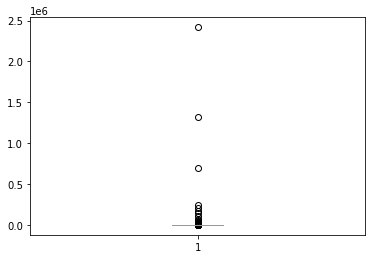

In [14]:
#boxplots of PRICE_VAR as its somewhat our target variable

price=df["PRICE_VAR"]
plt.boxplot(price)
plt.show()

We want to have a look at the distribution of $\textrm{PRICE_VAR}$ as our target variable is - to a large extent - made up by the variable $\textrm{PRICE_VAR}$. We want to look out for outliers. Use a better plot.

### 2.2 Correlations

In [15]:
#correlations with PRICE_VAR (sort of our target variable)

df_num = df.select_dtypes(include=["float64"])

corr_feat = df_num.corrwith(df_num["PRICE_VAR"])

#sorting by importance
corr_imp = corr_feat.sort_values(ascending=False)
corr_imp

#we have very interesting variables s.a Free Cash Flow Yield and SG&A Expenses Growth
#check that they are not deleted

PRICE_VAR                                    1.000000
operatingCycle                               0.161038
cashConversionCycle                          0.087703
SG&A Expenses Growth                         0.032797
3Y Shareholders Equity Growth (per Share)    0.009771
                                               ...   
10Y Revenue Growth (per Share)              -0.019559
Graham Net-Net                              -0.022868
Earnings Yield                              -0.047149
Free Cash Flow Yield                        -0.943080
operatingProfitMargin                             NaN
Length: 222, dtype: float64

As we are trying to classify a Buy/Hold/Sell strategy, we want to know which features are strongly correlated with $\textrm{PRICE_VAR}$ as they are important. We later also need to check that we do not loose them due to NA values or Zero values.

### 2.3 Correlations between the features

<AxesSubplot:>

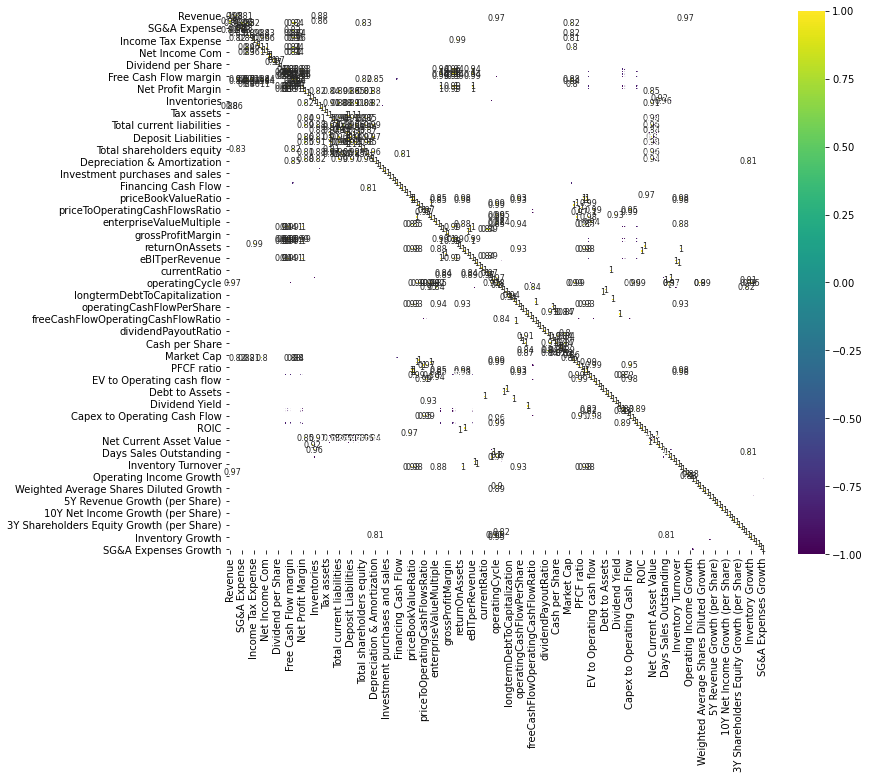

In [16]:
#correlation matrix (PRICE_VAR taken out; already done that)
#look at strongly correlated features

import seaborn as sns

corr=df_num.drop("PRICE_VAR",axis=1).corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, 
            annot_kws={"size": 8}, square=True)

# 3 Further Preprocessing 

### 3.1 Missing Values

In [17]:
# As we don't want to lose any values from some columns, we need to exclude them before we start handling nan / zero-values
# therefore we store the columns for later and drop them for now
strategy_data = df.loc[:, ['strategy']]
sector_data = df.loc[:, ['Sector']]
price_data = df.loc[:, ['PRICE_VAR']]
df.drop(['strategy', 'Sector', 'PRICE_VAR'], inplace=True, axis=1)

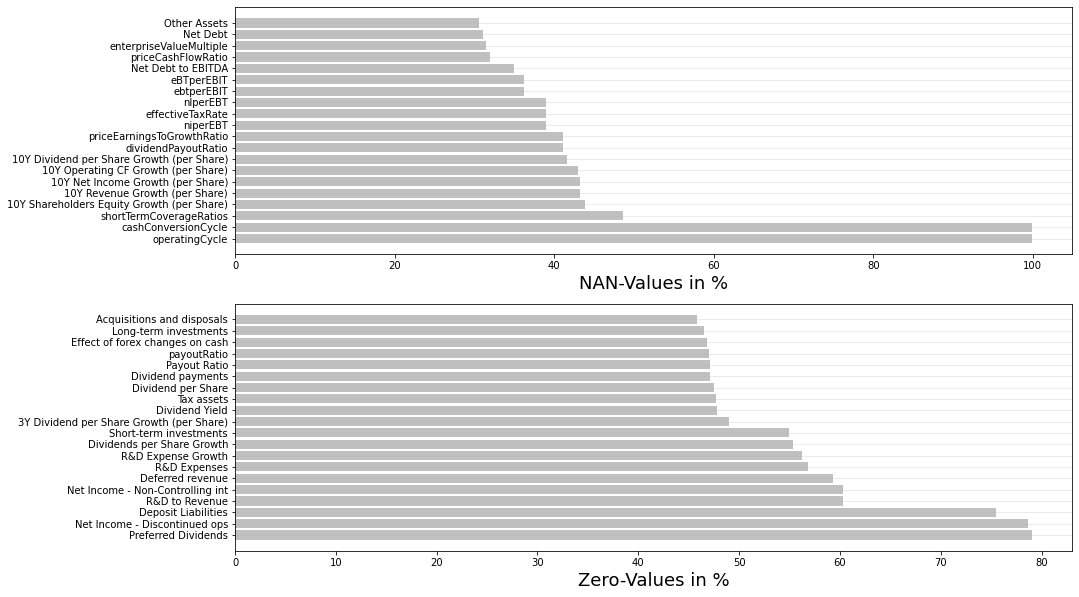

In [18]:
# to get some insight what percentage of nan/zero-values we have in the dataset, we visualize this by barchart
total_nans = df.isnull().sum().sort_values(ascending=False)
percent_nans = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
total_zeros = df.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (df.isin([0]).sum()/df.isin([0]).count() * 100).sort_values(ascending=False)
df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

# Graphs
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.barh(np.arange(20), df_nans['Percent NaN'].iloc[:20].values.tolist(), color='silver')
plt.yticks(np.arange(20), df_nans['Percent NaN'].iloc[:20].index.values.tolist())
plt.xlabel('NAN-Values in %', fontsize=18)
plt.grid(alpha=0.3, axis='y')

plt.subplot(2,1,2)
plt.barh(np.arange(20), df_zeros['Percent Zeros'].iloc[:20].values.tolist(), color='silver')
plt.yticks(np.arange(20), df_zeros['Percent Zeros'].iloc[:20].index.values.tolist())
plt.xlabel('Zero-Values in %', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

In [19]:
# we need to find a reasonable threshold to deal with the nan's and zeros
# we define to drop the top 10%

#nan's
test_nan_level = 0.9
print(df_nans.quantile(test_nan_level))
_, thresh_nan = df_nans.quantile(test_nan_level)

#zeros
test_zeros_level = 0.9
print(df_zeros.quantile(test_zeros_level))
_, thresh_zeros = df_zeros.quantile(test_zeros_level)

Total NaN      6535.000000
Percent NaN      29.600942
Name: 0.9, dtype: float64
Total Zeros      9310.700000
Percent Zeros      42.173755
Name: 0.9, dtype: float64


In [20]:
# we clean our dataset by applying the thresholds for both zeros, nan's
print(f'INITIAL NUMBER OF VARIABLES: {df.shape[1]}')
print()

df_test1 = df.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, 1)
print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {df_test1.shape[1]}')
print()

df_zeros_postnan = df_zeros.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, axis=0)
df_test2 = df_test1.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)
print(f'NUMBER OF VARIABLES AFTER Zeros THRESHOLD {thresh_zeros:.2f}%: {df_test2.shape[1]}')

INITIAL NUMBER OF VARIABLES: 222

NUMBER OF VARIABLES AFTER NaN THRESHOLD 29.60%: 200

NUMBER OF VARIABLES AFTER Zeros THRESHOLD 42.17%: 177


In [21]:
# sector and strategy need to be added to df_test2
df_test2['PRICE_VAR'] = price_data.values
df_test2['Sector'] = sector_data.values
df_test2['strategy'] = strategy_data.values

In [22]:
# create clean years
df14_clean = df_test2[df_test2['year']==2014]
df15_clean = df_test2[df_test2['year']==2015]
df16_clean = df_test2[df_test2['year']==2016]
df17_clean = df_test2[df_test2['year']==2017]
df18_clean = df_test2[df_test2['year']==2018]

display(df14_clean.shape, df15_clean.shape, df16_clean.shape, df17_clean.shape, df18_clean.shape)

(3808, 180)

(4120, 180)

(4797, 180)

(4960, 180)

(4392, 180)

### 3.2 Balancedness of the Target Variable

8587

1506

11984

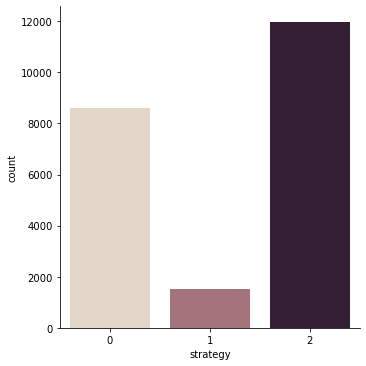

In [23]:
#going on a journey to search for outliers/check balancedness of the dataset
import seaborn as sns

sns.catplot(x="strategy", kind="count", palette ="ch:.25", data=df_test2)

display(sum(df_test2["strategy"]==0),sum(df_test2["strategy"]==1),sum(df_test2["strategy"]==2))

Our target variable $\textrm{strategy}$ is hugely imbalanced. There are $8587$ situations where one should have bought, $1506$ situations where one should held and $11984$ situations where one should have sold. We need to correct that which will be done using resampling techniques under...

### 3.3 Outliers 

In [24]:
# Get stocks that increased more than 200%

gain = 300

top_gainers = df_test2[df_test2["PRICE_VAR"] >= gain]
top_gainers = top_gainers["PRICE_VAR"].sort_values(ascending=False)
print(f"{len(top_gainers)} STOCKS with more than {gain}% gain.")
df_test2_drop = df_test2.drop(top_gainers.index)

113 STOCKS with more than 300% gain.


#### 3.3.1 Visualization of Outliers to get Convinced

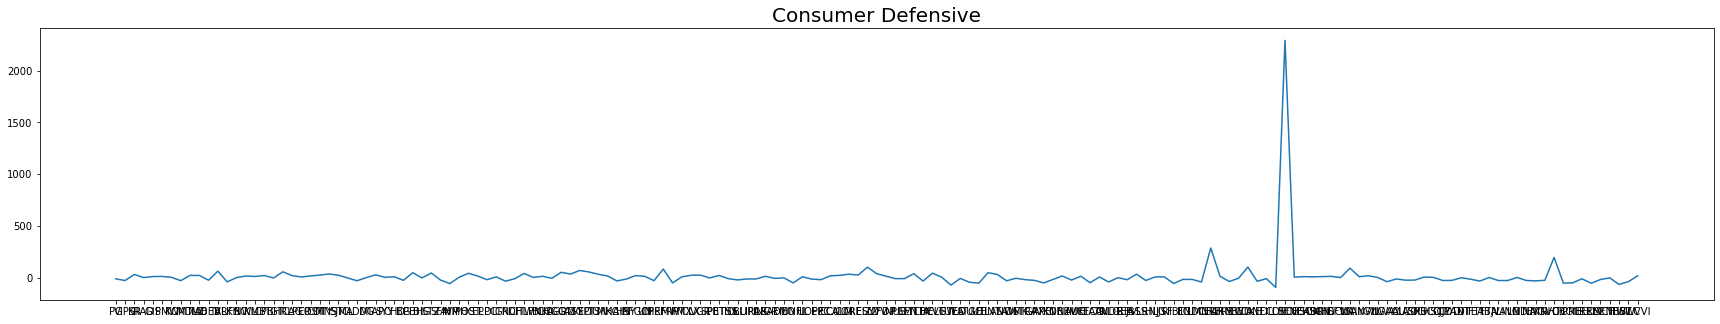

KeyboardInterrupt: 

In [25]:
for data in all_data:
    
    data_outliers=data.loc[:,["Sector", "PRICE_VAR"]]

    sector_list=data_outliers["Sector"].unique()

    
    for sector in sector_list:
    
        temp=data_outliers[data_outliers["Sector"] == sector]
    
        plt.figure(figsize=(30,5))
        plt.plot(temp["PRICE_VAR"])
        plt.title(sector,fontsize=20)
        plt.show()

We check the variable $\textrm{PRICE_VAR}$ by Sector and indeed see that there are huge outliers.They are mostly likely not organic as that would mean huge changes in $\textrm{PRICE_VAR}$ in one year, which is not likely. We hence delete those observations.

### 3.4 Deleting PRICE_VAR

In [25]:
df_test2_drop_pr=df_test2_drop.drop(columns=["PRICE_VAR"])

We are now done using PRICE_VAR and we have to delete it as it would otherwise explain our target variable almost perfectly as the target variable strategy is a categorical variable made from a linear combination of $\textrm{PRICE_VAR}$ and the respective S&P500 performance.

### 3.5 Creating Test and Train Sets

In [26]:
#creating train and test data in spirit of time series analysis

df_train = df_test2_drop_pr[(df_test2_drop_pr['year'] == 2014) | (df_test2_drop_pr['year'] == 2015) | 
                            (df_test2_drop_pr['year'] == 2016) | (df_test2_drop_pr['year'] == 2017)]

df_test = df_test2_drop_pr[df_test2_drop_pr["year"]==2018]

As we have data that implicitely capture a time variable and the observations are correlated (e.g the respective companies), we cannot just do a simple $80/20$ split as with i.i.d random variables but we need to use a Train/Test split in spirit of Time Series Analysis. That means that we train our model on the years $2014-2017$ and test it on the data from $2018$. That way, our model predicts the future, which is exactly what someone wanting an Investment Recommendation wants.

### 3.6 Deleting year

In [27]:
#we do not need the year anymore
df_train_drop=df_train.drop(columns=["year"])

df_test_drop=df_test.drop(columns=["year"])

We needed the column $\textrm{years}$ to get a subset of the data for the train/test split easily, which is done now. We now delete that column to prevent problems with collinearity.

### 3.7 Impute the remaining Data

#### 3.7.1 Choosing the numerical columns to impute on

In [28]:
#alternative

#for the train

strategy_data_train = df_train_drop.loc[:, ['strategy']]
sector_data_train = df_train_drop.loc[:, ['Sector']]

df_train_drop_drop = df_train_drop.drop(columns=["strategy","Sector"],axis=1)

#for the test

strategy_data_test = df_test_drop.loc[:, ['strategy']]
sector_data_test = df_test_drop.loc[:, ['Sector']]

df_test_drop_drop = df_test_drop.drop(columns=["strategy","Sector"],axis=1)

#### 3.7.2 Imputer

In [29]:
def imputer(data):
    
    imputer=IterativeImputer(max_iter=1,random_state=0)
    imputer.fit(data)
    imp_transform=imputer.transform(data)
    df_filled=pd.DataFrame(imp_transform,columns=df_train_drop_drop.columns,index=data.index)

    return df_filled

df_train_imputed=imputer(df_train_drop_drop)
df_test_imputed=imputer(df_test_drop_drop)

C:\Users\frede\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\frede\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


The Imputation is done seperately for the training set and for the test set as the imputer uses columns $X_{(-j)}$ to impute column $X_j$ and we do not want any information of the training set leaking into the testing set.

#### 3.7.3 Adding the non-numerical Columns back

In [30]:
#first for train

df_train_imputed["strategy"]=strategy_data_train.values
df_train_imputed["Sector"]=sector_data_train.values

#now for test

df_test_imputed["strategy"]=strategy_data_test.values
df_test_imputed["Sector"]=sector_data_test.values

#### 3.7.4 Exporting to CSV files for easy workflow

In [31]:
#making csv files for the preprocessed dataset

df_train_imputed.to_csv("Data/Clean Training Set.csv")
df_test_imputed.to_csv("Data/Clean Test Set.csv")

#### 3.7.5 Did it work?

In [32]:
display(df_train_imputed.isnull().sum(),
df_test_imputed.isnull().sum())

Revenue                        0
Revenue Growth                 0
Cost of Revenue                0
Gross Profit                   0
SG&A Expense                   0
                              ..
Book Value per Share Growth    0
Debt Growth                    0
SG&A Expenses Growth           0
strategy                       0
Sector                         0
Length: 178, dtype: int64

Revenue                        0
Revenue Growth                 0
Cost of Revenue                0
Gross Profit                   0
SG&A Expense                   0
                              ..
Book Value per Share Growth    0
Debt Growth                    0
SG&A Expenses Growth           0
strategy                       0
Sector                         0
Length: 178, dtype: int64

### 3.8 Creating Feature Matrix and Target Variable Column for the Test and Training Sets

In [33]:
Y_train=df_train_imputed["strategy"]

Y_test=df_test_imputed["strategy"]

X_train=df_train_imputed.drop(columns=["strategy"])

X_test=df_test_imputed.drop(columns=["strategy"])

### 3.9 Resampling the Data because of Imbalance of Target Variable

In [34]:
from sklearn.utils import resample

#first resample the 1s

X_train_up_1, Y_train_up_1 = resample(X_train[Y_train==1],
                                      Y_train[Y_train==1],replace=True,n_samples=X_train[Y_train==2].shape[0],random_state=1)
#now resample the 0s

X_train_up_0, Y_train_up_0 = resample(X_train[Y_train==0],
                                      Y_train[Y_train==0],replace=True,n_samples=X_train[Y_train==2].shape[0],random_state=1)

#combine datasets

X_train_balanced=np.vstack((X_train[Y_train==2],X_train_up_1,X_train_up_0))
Y_train_balanced=np.hstack((Y_train[Y_train==2],Y_train_up_1,Y_train_up_0))

#we loose the indices while resampling so lets reconstruct them:
#getting the indices

array1l=X_train[Y_train==2].index
array2l=X_train_up_1.index
array3l=X_train_up_0.index

#appending them to a 1D array suited for indices

arr1=array1l.append(array2l)
arr2=arr1.append(array3l)
arr3 = np.array(arr2)

#we now have to recover the pd.dataframes and pd.Series (numpy array otherwise)

X_train_bal_df=pd.DataFrame(X_train_balanced,columns=X_train.columns, index=arr3)
Y_train_bal_ser=pd.Series(Y_train_balanced)
Y_train_bal_ser=Y_train_bal_ser.astype('category')

#unfortunately the resampling converts all features into numerical variables which is why we have to convert them back
#for the Xs

le=pp.LabelEncoder()
X_train_bal_df["Sector"]=le.fit_transform(X_train_bal_df["Sector"])

#balance:
display(sum(Y_train_bal_ser==0),sum(Y_train_bal_ser==1),sum(Y_train_bal_ser==2))

9086

9086

9086

We used differnet resampling techniques but settled on this one as it gives good results and yields a perfectly balanced target variable and does not reduce the observations $n$ at all. We end up with $9086$ observations implying a Hold strategy, $9086$ observations implying a Sell strategy and $9086$ observations implying a Buy strategy. We only impute on the training set as the test set should remain untouched as it represents the "future" we are trying the predict. 

# 4 Feature Selection 


### 4.1 Visualization of feature importance

Feature: 0, Score: 0.00498
Feature: 1, Score: 0.00670
Feature: 2, Score: 0.00396
Feature: 3, Score: 0.00516
Feature: 4, Score: 0.00580
Feature: 5, Score: 0.00547
Feature: 6, Score: 0.00544
Feature: 7, Score: 0.00414
Feature: 8, Score: 0.00574
Feature: 9, Score: 0.00682
Feature: 10, Score: 0.00621
Feature: 11, Score: 0.00573
Feature: 12, Score: 0.00670
Feature: 13, Score: 0.00622
Feature: 14, Score: 0.00630
Feature: 15, Score: 0.00626
Feature: 16, Score: 0.00479
Feature: 17, Score: 0.00600
Feature: 18, Score: 0.00523
Feature: 19, Score: 0.00547
Feature: 20, Score: 0.00559
Feature: 21, Score: 0.00457
Feature: 22, Score: 0.00467
Feature: 23, Score: 0.00618
Feature: 24, Score: 0.00545
Feature: 25, Score: 0.00499
Feature: 26, Score: 0.00616
Feature: 27, Score: 0.00587
Feature: 28, Score: 0.00450
Feature: 29, Score: 0.00342
Feature: 30, Score: 0.00578
Feature: 31, Score: 0.00537
Feature: 32, Score: 0.00395
Feature: 33, Score: 0.00543
Feature: 34, Score: 0.00446
Feature: 35, Score: 0.00508
Fe

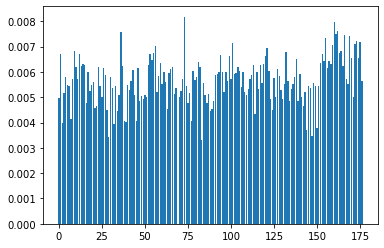

In [35]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_bal_df,Y_train_bal_ser)

importance = forest.feature_importances_

#summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

#plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The feature importance is quite uniformly distributed.

### 2.2 Choosing features

In [36]:
#feature selection

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100),threshold="median")
sel.fit(X_train_bal_df, Y_train_bal_ser)

#which ones were selected?

sel.get_support()

#list of selected variables

selected_feat= X_train_bal_df.columns[(sel.get_support())]

display(selected_feat,len(selected_feat))

Index(['Revenue Growth', 'SG&A Expense', 'Income Tax Expense', 'Net Income',
       'Net Income Com', 'EPS', 'EPS Diluted', 'Weighted Average Shs Out',
       'Weighted Average Shs Out (Dil)', 'EBITDA Margin',
       'Consolidated Income', 'Earnings Before Tax Margin',
       'Net Profit Margin', 'Cash and cash equivalents',
       'Cash and short-term investments', 'Short-term debt',
       'Total liabilities', 'Other comprehensive income',
       'Retained earnings (deficit)', 'Other Liabilities',
       'Investing Cash flow', 'Issuance (repayment) of debt',
       'Issuance (buybacks) of shares', 'Financing Cash Flow',
       'Net cash flow / Change in cash', 'Free Cash Flow',
       'Net Cash/Marketcap', 'priceBookValueRatio', 'priceToSalesRatio',
       'priceEarningsRatio', 'priceToOperatingCashFlowsRatio',
       'priceSalesRatio', 'priceFairValue', 'returnOnEquity',
       'fixedAssetTurnover', 'assetTurnover', 'currentRatio', 'quickRatio',
       'cashRatio', 'cashFlowToDebtRa

89

The feature space was reduced from originally $p=176$ features to $p_{new}=89$ features using the median of the feature importances as the threshold.

### 2.3 Creating variables to work with reduced feature space

In [37]:
#we only choose 89 features according to our feature selection

X_train_bal_df_sel=X_train_bal_df[selected_feat]

X_test_sel=X_test[selected_feat]

We apply the feature reduction to the feature spaces $X_{train}$ and $X_{test}$.

# 5 Machine Learning Algorithms

### 5.1 Logistic Regression



We first want to use a simpler model to see how it performs so we have a frame of refences when implementing more complex models. 

#### 5.1.1 Function for the Logistic Regression

In [38]:
def LOGIMODI(X_train, Y_train):
    
    """
    Implements a Logistic Regression
    X_train: matrix of features of training set
    Y_train: target variable of training set
    """
    
    logModel = LogisticRegression(max_iter=100, tol=0.1,random_state=1, n_jobs=-1,warm_start=True)
    
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('logreg', logModel)])
    
    param_grid = {'logreg__penalty': ["elasticnet"], 
              'logreg__C': [0.1], #[0,1000]
              'logreg__solver': ["saga"], 
              'logreg__l1_ratio':[0]} # [0,1]
    
    #grid search to find best parameters
    
    grid = GridSearchCV(pipe,param_grid=param_grid, cv=5, n_jobs=-1)
    grid = grid.fit(X_train,Y_train)
    
    return(grid)

#### 5.1.2 Fitting the Logistic Regression and Predicting on the Test Set and Results

In [39]:
grid = LOGIMODI(X_train_bal_df_sel,Y_train_bal_ser)

#getting the results

print('Best parameters:', grid.best_params_) 
print('Best Crossvalidation accuracy:', grid.best_score_)
print('Test score:', grid.score(X_test_sel,Y_test)) 

#predict on test set

y_logimodi = grid.predict(X_test_sel)

#confusion matrix

confmat = pd.DataFrame({'Predicted': y_logimodi,
                      'True': Y_test})
print(confmat.groupby(['True','Predicted'], sort=True).size().unstack('Predicted'))

Best parameters: {'logreg__C': 0.1, 'logreg__l1_ratio': 0, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
Best Crossvalidation accuracy: 0.36202276588611165
Test score: 0.46711753731343286
Predicted    0    1     2
True                     
0          442  238   747
1           66   83    95
2          804  335  1478


### 5.2 Support Vector Machines 

### 5.2.1 Polynomial Kernel Function

#### 5.2.1.1 Function for the Support Vector Machine with a Polynomial Kernel Function

In [41]:
def SVM_polynomial(X_train,Y_train,parameters):
    
    """
    Implements a SVM using a polynomial kernel
    X_train: matrix of features of training set
    Y_train: target variable of training set
    parameters: Grid of parameters
    return: Cross-Validated optimal hyperparameter model fit
    """
    
    
    # Create pipeline object with standard scaler and SVC estimator
    
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('svm_poly', SVC(kernel='poly', random_state=0, max_iter=100))])

    # Run grid search
    
    grid = GridSearchCV(pipe, param_grid=parameters, cv=5, n_jobs=-1)
    grid = grid.fit(X_train, Y_train)
    return(grid)

#### 5.2.1.2 Fitting the Support Vector Machine with a Polynomial Kernel Function and Predicting on the Test Set and Results

In [50]:
parameters = {'svm_poly__C': [1000], #[1, 1500]
              'svm_poly__degree': [3], #[2, 5]
              'svm_poly__gamma': [0.005], #[0.001, 100]
              'svm_poly__coef0':[0.01]} #[0.01, 1]
#fit the model
    
poly = SVM_polynomial(X_train_bal_df_sel,Y_train_bal_ser, parameters)

print('Best Crossvalidation accuracy: {:.4f}'.format(poly.best_score_))
print('Test score:       {:.4f}'.format(poly.score(X_test_sel, Y_test)))
print('Best parameters: {}'.format(poly.best_params_))

#predict on test set

y_pred_svm_poly = poly.predict(X_test_sel)

# confusion matrix

confmat = pd.DataFrame({'Predicted': y_pred_svm_poly,
                      'True': Y_test})
print('Polynomial Kernel Function yields the following confusion matrix:')
print(confmat.groupby(['True','Predicted'], sort=True).size().unstack('Predicted'))


#how many were classified correctly:

correct = np.sum(Y_test == poly.predict(X_test_sel))
print(f"Out of {len(Y_test)} observations {correct} were classified correctly.")

Best Crossvalidation accuracy: 0.3338
Test score:       0.5606
Best parameters: {'svm_poly__C': 1000, 'svm_poly__coef0': 0.01, 'svm_poly__degree': 3, 'svm_poly__gamma': 0.005}
Polynomial Kernel Function yields the following confusion matrix:
Predicted      0    1       2
True                         
0          134.0  1.0  1292.0
1           28.0  1.0   215.0
2          348.0  NaN  2269.0
Out of 4288 observations 2404 were classified correctly.


C:\Users\Jan Beeler\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


#### 5.2.1.3 Performance ? (maybe do this for all?)

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

SVM with Polynomial Function:
              precision    recall  f1-score   support

           0      0.263     0.094     0.138      1427
           1      0.500     0.004     0.008       244
           2      0.601     0.867     0.710      2617

    accuracy                          0.561      4288
   macro avg      0.455     0.322     0.285      4288
weighted avg      0.483     0.561     0.480      4288



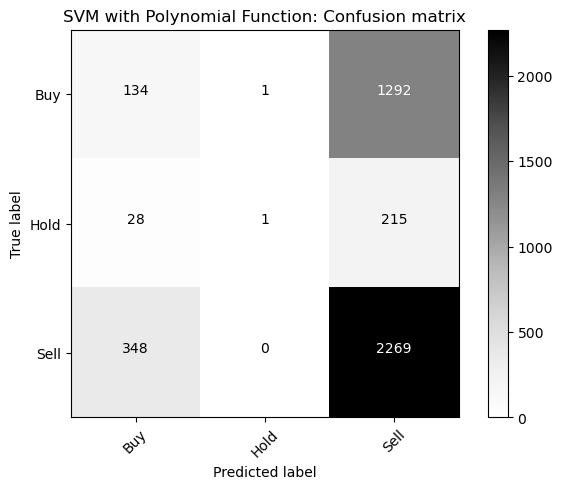

In [59]:
plt.style.use('default')
print('SVM with Polynomial Function:')
print(metrics.classification_report(Y_test, y_pred_svm_poly, digits=3))
# Compute confusion matrix
confm = confusion_matrix(Y_test, y_pred_svm_poly)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confm, classes=['Buy', 'Hold', 'Sell'],
                      title='SVM with Polynomial Function: Confusion matrix');

### 5.2.2 Radial Basis Function

#### 5.2.2.1 Function for the Support Vector Machine with a Radial Basis Function

In [61]:
def SVM_rbf(X_train,Y_train,parameters):
    
    """
    Implements a SVM using a radial basis function
    X_train: matrix of features of training set
    Y_train: target variable of training set
    parameters: Grid of parameters
    return: Cross-Validated optimal hyperparameter model fit
    
    """
    
    # Create pipeline object with standard scaler and SVC estimator
    
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('svm_rbf', SVC(kernel='rbf', random_state=0, max_iter=100))])
    
    # Run grid search
    
    grid = GridSearchCV(pipe, param_grid=parameters, cv=5, n_jobs=-1)
    grid = grid.fit(X_train, Y_train)
    return(grid)

#### 5.2.2.2 Fitting the Support Vector Machine with a Radial Basis Function and Predicting on the Test Set and Results

In [62]:
parameters = {'svm_rbf__C': [5], #[1, 1500]
              'svm_rbf__gamma': [0.001]} #[0.01, 100]

#fit the model

rbf = SVM_rbf(X_train_bal_df_sel,Y_train_bal_ser,parameters)

#results

print('Best Crossvalidated accuracy: {:.4f}'.format(rbf.best_score_))
print('Test score:       {:.4f}'.format(rbf.score(X_test_sel, Y_test)))
print('Best parameters: {}'.format(rbf.best_params_))

#prediction on test set

y_pred_svm_rbf = rbf.predict(X_test_sel)

# confusion matrix

confm = pd.DataFrame({'Predicted': y_pred_svm_rbf,
                      'True': Y_test})

print('Radial Basis Function Kernel yields the following confusion matrix:')
print(confm.groupby(['True','Predicted'], sort=True).size().unstack('Predicted'))

#how many were classified correctly:

correct = np.sum(Y_test == rbf.predict(X_test_sel))
print(f"Out of {len(Y_test)} observations {correct} were classified correctly.")

C:\Users\Jan Beeler\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Best Crossvalidated accuracy: 0.3324
Test score:       0.5352
Best parameters: {'svm_rbf__C': 5, 'svm_rbf__gamma': 0.001}
Radial Basis Function Kernel yields the following confusion matrix:
Predicted    0     2
True                
0          230  1197
1           49   195
2          552  2065
Out of 4288 observations 2295 were classified correctly.


### 5.2.3 Sigmoid Function

#### 5.2.3.1 Function for the Support Vector Machine with a Sigmoid Function

In [63]:
def SVM_sig(X_train,Y_train,parameters):
    
    """
    Implements a SVM using a sigmoid function
    X_train: matrix of features of training set
    Y_train: target variable of training set
    parameters: Grid of parameters
    return: Cross-Validated optimal hyperparameter model fit
    """
    
    # Create pipeline with scaler and SCV estimator
    
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('svm_sig', SVC(kernel='sigmoid', random_state=0, max_iter=100))])

    # Run grid search
    
    grid = GridSearchCV(pipe, param_grid=parameters, cv=5, n_jobs=-1) 
    grid = grid.fit(X_train, Y_train)
    return(grid)

#### 5.2.3.2 Fitting the Support Vector Machine with a Sigmoid Function and Predicting on the Test Set and Results

In [76]:
parameters = {'svm_sig__C': [5], #[1, 1500]
              'svm_sig__gamma': [0.05]} #[0.01, 100]

#fit the model

sig = SVM_sig(X_train_bal_df_sel,Y_train_bal_ser,parameters)

#results

print('Best CV accuracy: {:.4f}'.format(sig.best_score_))
print('Test score:       {:.4f}'.format(sig.score(X_test_sel, Y_test)))
print('Best parameters: {}'.format(sig.best_params_))
print(datetime.datetime.now())


# Predict on test set

y_pred_svm_sig = sig.predict(X_test_sel)

# confusion matrix

confm = pd.DataFrame({'Predicted': y_pred_svm_sig,
                      'True': Y_test})
print('Sigmoid Function Kernel yields the following confusion matrix:')
print(confm.groupby(['True','Predicted'], sort=True).size().unstack('Predicted'))

#how many were classified correctly:

correct = np.sum(Y_test == sig.predict(X_test_sel))
print(f"Out of {len(Y_test)} observations {correct} were classified correctly.")

C:\Users\Jan Beeler\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Best CV accuracy: 0.3331
Test score:       0.5805
Best parameters: {'svm_sig__C': 5, 'svm_sig__gamma': 0.05}
2021-04-16 19:04:05.448449
Sigmoid Function Kernel yields the following confusion matrix:
Predicted    0   1     2
True                    
0          218  14  1195
1           52   9   183
2          334  21  2262
Out of 4288 observations 2489 were classified correctly.


## 5.3 Random Forest

#### 5.3.1 Function for the Random Forest

In [77]:
def randomforest(X_train, Y_train, n_estimators, max_depth, min_samples_split, min_samples_leaf):
   
    """
    Implements a random forest 
    X_train: matrix of features of training set
    Y_train: target variable of training set
    n_estimators: number of trees
    max_depth: maximal depth of trees
    min_samples_split: at least min_samples_split samples split at each node
    min_samples_leaf: at least min_samples_leaf at each leaf or terminal node
    return: Cross-Validated optimal hyperparameter model fit
    """
    
    #specify the parameters that will be gone through
    
    parameters = {"n_estimators": n_estimators,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf},

    #Run grid search
    
    grid = GridSearchCV(RandomForestClassifier(random_state=0),param_grid=parameters,
                        scoring="accuracy",cv= 5, n_jobs=-1)
    
    grid = grid.fit(X_train, Y_train)
    return(grid)

#### 5.3.2 Defining Parameters

In [78]:
#number of trees
n_estimators = [100,200] #500

# maximal depth of trees
max_depth = [100,200] #500

# at least min_samples_split samples split at each node
min_samples_split = np.array([3])

# at least min_samples_leaf at each leaf or terminal node
min_samples_leaf = np.array([1])

#### 5.3.3 Fitting the Random Forest and Predicting on the Test Set and Results


In [79]:
forest = randomforest(X_train_bal_df, Y_train_bal_ser, n_estimators, max_depth, min_samples_split, min_samples_leaf)

print("Best CV accuracy: {:.4f}".format(forest.best_score_))
print("Test score:       {:.4f}".format(forest.score(X_test,Y_test)))
print("Best parameters: {}".format(forest.best_params_))


#predicting on the test set
Y_pred_rf = forest.predict(X_test)

# confusion matrix
confmat = pd.DataFrame({"Predicted": Y_pred_rf,"True": Y_test})

print(confmat.groupby(["True","Predicted"], sort=True).size().unstack("Predicted"))

correct = np.sum(Y_test == forest.predict(X_test))
print(f"Out of {len(Y_test)} observations {correct} were classified correctly.")

Best CV accuracy: 0.8133
Test score:       0.5774
Best parameters: {'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Predicted    0  1     2
True                   
0          328  5  1094
1           74  3   167
2          466  6  2145
Out of 4288 observations 2476 were classified correctly.


## 5.4 Neural Network

#### 5.4.1 Function for the Neural Network

In [80]:
def neuralnet(X_train, Y_train, hidden_layer, maxIter):
    
    """
    Implements a random forest 
    X_train: matrix of features of training set
    Y_train: target variable of training set
    hidden_layer: number of hidden layers
    maxIter: maximal number of iterations
    return: Cross-Validated optimal hyperparameter model fit
    """
   

    mlp = MLPClassifier(random_state=0, solver= "lbfgs", warm_start= True)
    
    #make pipeline using scaler and MLP classifier
    
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('neural', MLPClassifier())])
    
    #Define the parameter-values
    
    param_grid = {"neural__hidden_layer_sizes" : hidden_layer,
                  'neural__max_iter': maxIter},

    #grid search
    
    grid = GridSearchCV(pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv= 5, n_jobs=-1)
    grid = grid.fit(X_train, Y_train)
    return(grid)

#### 5.4.2 Defining Parameters

In [81]:
hidden_lay = np.array([100])

max_Iter = np.array([100])

#### 5.4.2 Fitting the Neural Network and Predicting on the Test Set and Results

In [82]:
#fit the model 

mlp = neuralnet(X_train_bal_df_sel,Y_train_bal_ser, hidden_lay, max_Iter)

#results

print('Best CV accuracy: {:.4f}'.format(mlp.best_score_))
print('Test score:       {:.4f}'.format(mlp.score(X_test_sel,Y_test)))
print('Best parameters: {}'.format(mlp.best_params_))

# Predicting on test set

Y_pred_nn = mlp.predict(X_test_sel)

# confusion matrix

confm = pd.DataFrame({'Predicted': Y_pred_nn,
                      'True': Y_test})
print(confm.groupby(['True','Predicted'], sort=True).size().unstack('Predicted'))

#how many were classified correctly:

correct = np.sum(Y_test == forest.predict(X_test_sel))
print(f"Out of {len(Y_test)} observations {correct} were classified correctly.")

KeyboardInterrupt: 

# 4 Performance & Evaluation

We further analyze performance measures for the Random Forest, which is our best algorithm. We check multiple performance measures to make sure that the performance is stable and not solely dependent on the accuarcy score. We checked all the performance measures for all the algorithmns in deciding which one we prefer but we settled on showing the results only for the best algorithm which is cleaner.

### 4.1 Accuracy Score

In [ ]:
acc_score_rf=accuracy_score(Y_test,Y_pred_rf)
acc_score_rf

### 4.2 Confusion Matrix

In [ ]:
confmat_rf=confusion_matrix(Y_test,Y_pred_rf)

### 4.3 Precision, Recall and F1 Score

In [ ]:
target_names=["buy","hold","sell"]
report_rf=classification_report(Y_test,Y_pred_rf,target_names=target_names)

# 5 Final Investment Recommendation

As the (Random Forest) gave us the best results, we decided to base our strategy for $2018$ on the Random Forest Classifier. As we want to know what we should do with the stocks, we want to get 3 dataframes containing the stocks belonging to each of the three strategies.

#### 5.1 Shares you should buy going into 2018

In [ ]:
Y_pred=pd.DataFrame(Y_pred_rf,columns=["strategy"],index=X_test.index)

buy=Y_pred[Y_pred["strategy"]==0]
display(buy)

#### 5.2 Shares you should hold going into 2018

In [ ]:
hold=buy=Y_pred[Y_pred["strategy"]==1]
display(hold)

#### 5.3 Shares you should sell going into 2018

In [ ]:
sell=Y_pred[Y_pred["strategy"]==2]
display(sell)